### functionality

### required directory structure

### imports and inputs

In [15]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
from packages import plotstyle as ps
sb.set_theme(style="white",font='serif')

uid = 'uid___A002_Xed4607_X13266'

date = '8_9_2021' # Since Archive is reserved for unprocessed solutions, we need to tap into an "Observational 
                   # Data" directory for our processed solution.
    
plotWeaStats = True # Plotting weather stations will enlarge plot limits, which is not always desirable

refants = ['DA59','DV11','DA49','DV12','PM01','DV07'] # Fill with notable antnames to be plotted in different color. If not needed, leave empty

directory = '/Users/colemeyer/Documents/Offset Drift/Observational Data' # Directory of "Observational Data", assuming specified structure

### loading and cleaning data

In [16]:
directory = directory+'/'+date+'/ASDMs/'+uid

antArr = pd.read_csv(directory+'/AntData.csv')[['antname','geoposX','geoposY']]
weaArr = pd.read_csv(directory+'/WeaData.csv')[['padname','geoposX','geoposY']]
antArr.index = antArr.antname
weaArr.index = weaArr.padname
antArr = antArr[['geoposX','geoposY']]
weaArr = weaArr[['geoposX','geoposY']]
antArr.geoposY = -antArr.geoposY
weaArr.geoposY = -weaArr.geoposY

### extrema

In [17]:
xmax = max(antArr.loc[:,'geoposX'])+(0.1*(max(antArr.loc[:,'geoposX'])-min(antArr.loc[:,'geoposX'])))
xmin = min(antArr.loc[:,'geoposX'])-(0.1*(max(antArr.loc[:,'geoposX'])-min(antArr.loc[:,'geoposX'])))
ymax = max(antArr.loc[:,'geoposY'])+(0.1*(max(antArr.loc[:,'geoposY'])-min(antArr.loc[:,'geoposY'])))
ymin = min(antArr.loc[:,'geoposY'])-(0.1*(max(antArr.loc[:,'geoposY'])-min(antArr.loc[:,'geoposY'])))

# plot

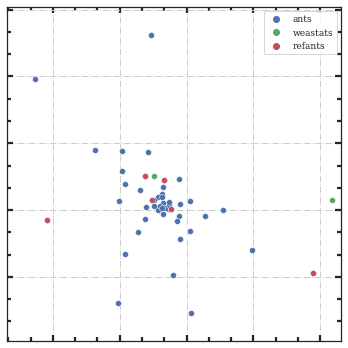

In [18]:
plt.subplots(figsize=(5,5))

# Call sb.scatterplot for antArr data
ax1 = sb.scatterplot(x='geoposX', y='geoposY', data=antArr, color='b')
handles = [Line2D([0],[0],marker='o',color='b',label='ants',linewidth=0)]

# Call sb.scatterplot for weaArr data if plotWeaStats != True
if plotWeaStats: 
    ax2 = sb.scatterplot(x='geoposX', y='geoposY', data=weaArr, color='g')
    handles.append(Line2D([0],[0],marker='o',color='g',label='weastats',linewidth=0))
    
# Call sb.scatterplot for refants if refants != []
if refants != []:
    refAntArr = pd.DataFrame(columns=['geoposX','geoposY'])
    for ant in refants:
        refAntArr = refAntArr.append(antArr.loc[ant])
    ax3 = sb.scatterplot(x='geoposX', y='geoposY', data=refAntArr, color='r')
    handles.append(Line2D([0],[0],marker='o',color='r',label='refants',linewidth=0))
    
# Apply styling
ps.plotNonDescript(ax1, title='Array Configuration (*'+uid[11:]+')', xmax=xmax, xmin=xmin, 
                   ymax=ymax, ymin=ymin, handles=handles,majors=5,minors=3)

#ax1.invert_yaxis()

plt.tight_layout()